# Loan Approval Prediction: Leveraging Machine Learning for Risk Assessment

Aim of this project is to develop a predictive model to assess loan eligibility for applicants while simultaneously aiding the bank in risk mitigation and reducing the incidence of defaults.

Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [1]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('../data/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('../data/test_Y3wMUE5_7gLdaTN.csv')

## Dataset Overview

This step involves exploring and understanding the characteristics of the training dataset, including its shape, data format, categorical variables, target variable distribution, missing data, and numerical feature descriptions.

In [2]:
# Display the shape of the training dataset
print("Training data shape:", train_df.shape)

Training data shape: (614, 13)


In [3]:
# Display the first few rows of the training dataset
print("\nFirst few rows of the training data:")
print(train_df.head())


First few rows of the training data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Ru

In [4]:
# Display information about the training dataset, including data types and non-null values
print("\nInformation about the training dataset:")
print(train_df.info())


Information about the training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
# Check unique values and their counts in the target variable of the training dataset
print("\nCounts of unique values in target variable (training data):")
print(train_df['Loan_Status'].value_counts())


Counts of unique values in target variable (training data):
Loan_Status
Y    422
N    192
Name: count, dtype: int64


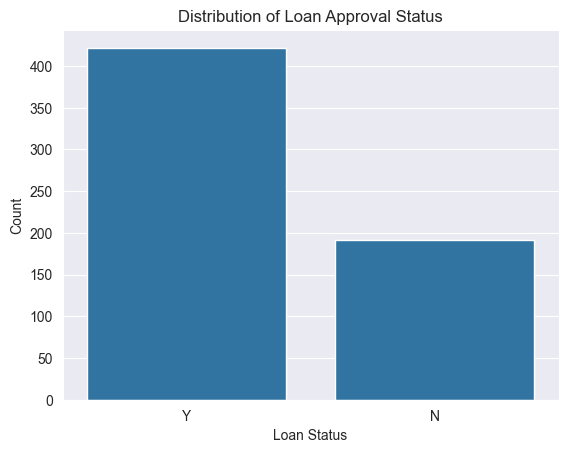

In [6]:
# Visualize the distribution of the target variable
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [7]:
# Check for missing values in the training dataset
print("\nMissing values in the training dataset:")
print(train_df.isnull().sum())


Missing values in the training dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Generate descriptive statistics for numerical features in the training dataset
print("\nDescriptive statistics for numerical features (training data):")
print(train_df.describe())


Descriptive statistics for numerical features (training data):
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


This step involves exploring and understanding the characteristics of the training dataset. The dataset contains 614 entries with 13 columns. We first examined the shape of the dataset, finding 614 rows and 13 columns. Next, we inspected the first few rows of the dataset to understand its structure and identified key features such as gender, marital status, education, income, loan amount, and property area. Further analysis revealed that the dataset consists of both numerical and categorical variables. The target variable, 'Loan_Status', indicates whether a loan application was approved ('Y') or not ('N'). From the count of unique values in the target variable, we confirmed that this is a binary classification problem. Additionally, we identified missing values in several columns, such as 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History'. Lastly, we generated descriptive statistics for numerical features, providing insights into the distribution and central tendencies of applicant and co-applicant incomes, loan amounts, loan terms, and credit history. This comprehensive overview lays the foundation for further data preprocessing and model development.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the characteristics of the dataset and gaining insights into the relationships between variables. In this section, we will explore the distribution of features and the target variable, identify any patterns or trends in the data, and examine relationships between features and the target variable.

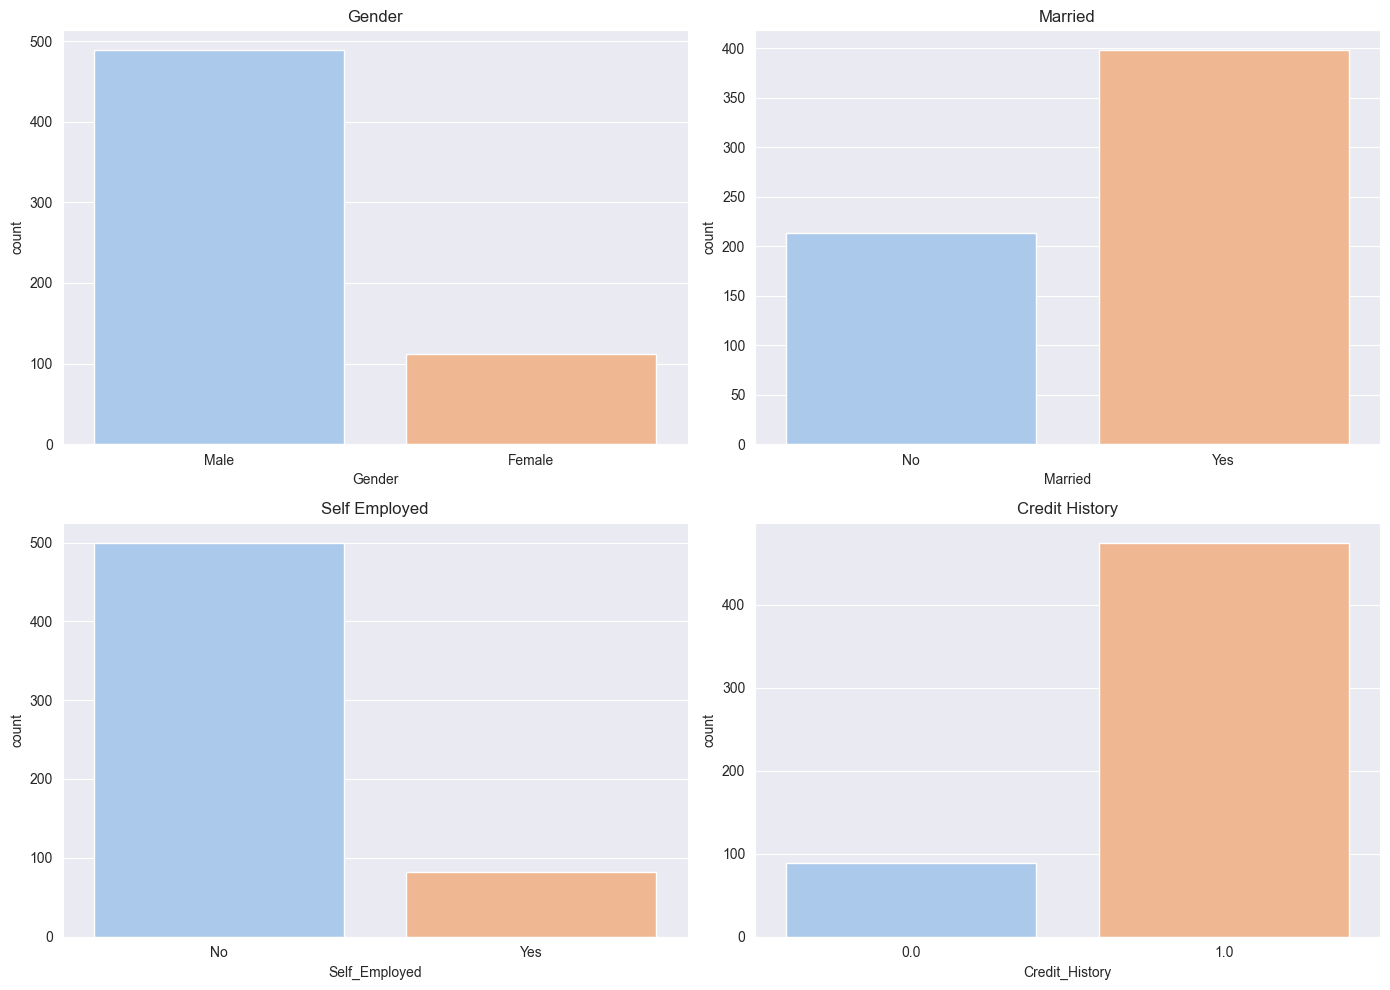

In [9]:
# Visualising Categorical variables
plt.figure(figsize=(14, 10))

# Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=train_df, hue='Gender', palette='pastel', legend=False)
plt.title('Gender')

# Marital status distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Married', data=train_df, hue='Married', palette='pastel', legend=False)
plt.title('Married')

# Self-employed distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Self_Employed', data=train_df, hue='Self_Employed', palette='pastel', legend=False)
plt.title('Self Employed')

# Credit history distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Credit_History', data=train_df, hue='Credit_History', palette='pastel', legend=False)
plt.title('Credit History')

plt.tight_layout()
plt.show()

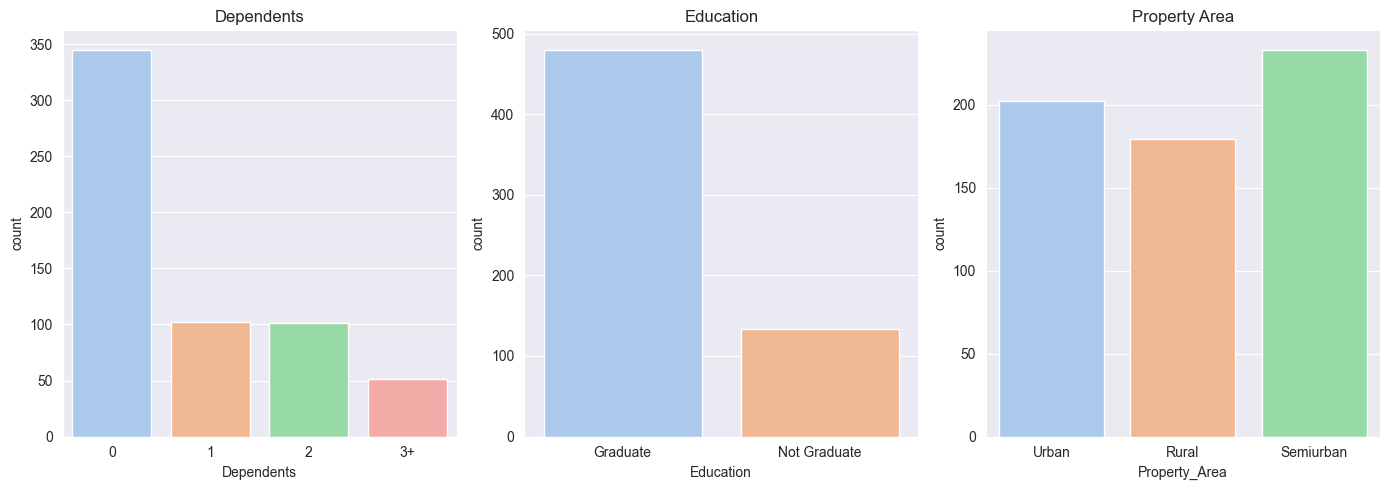

In [10]:
# Visualising Ordinal Variable
plt.figure(figsize=(14, 5))

# Dependents distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Dependents', data=train_df, hue='Dependents', palette='pastel', legend=False)
plt.title('Dependents')

# Education distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Education', data=train_df, hue='Education', palette='pastel', legend=False)
plt.title('Education')

# Property area distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Property_Area', data=train_df, hue='Property_Area', palette='pastel', legend=False)
plt.title('Property Area')

plt.tight_layout()
plt.show()

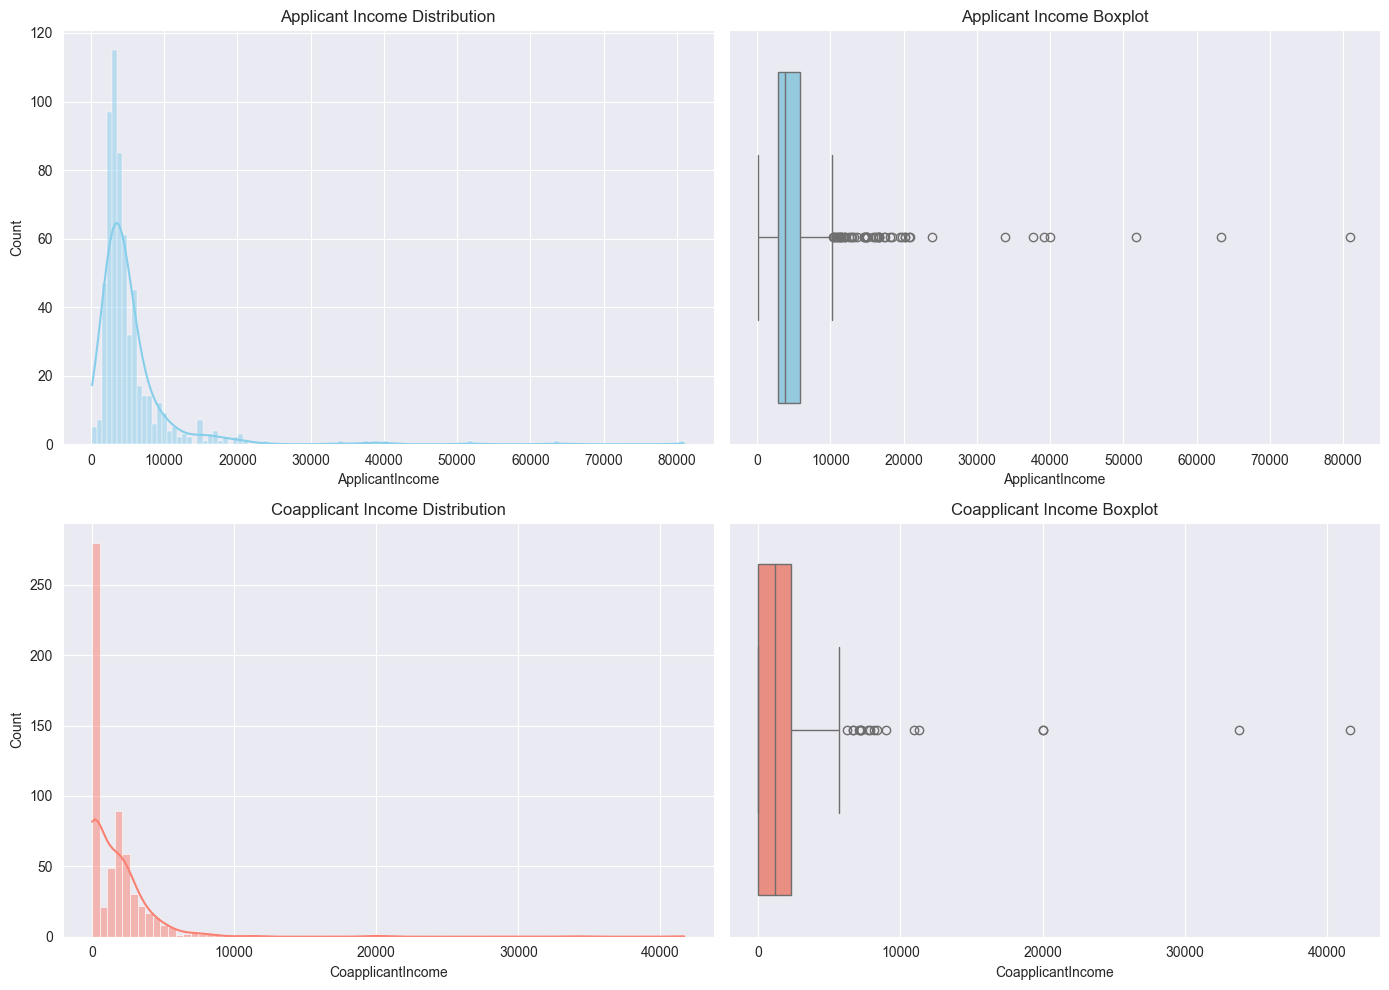

In [11]:
# Visualising Numeric Variables and checking for outliers
plt.figure(figsize=(14, 10))

# Applicant income distribution and outliers
plt.subplot(2, 2, 1)
sns.histplot(train_df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Applicant Income Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(x='ApplicantIncome', data=train_df, color='skyblue')
plt.title('Applicant Income Boxplot')

# Coapplicant income distribution and outliers
plt.subplot(2, 2, 3)
sns.histplot(train_df['CoapplicantIncome'], kde=True, color='salmon')
plt.title('Coapplicant Income Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(x='CoapplicantIncome', data=train_df, color='salmon')
plt.title('Coapplicant Income Boxplot')

plt.tight_layout()
plt.show()

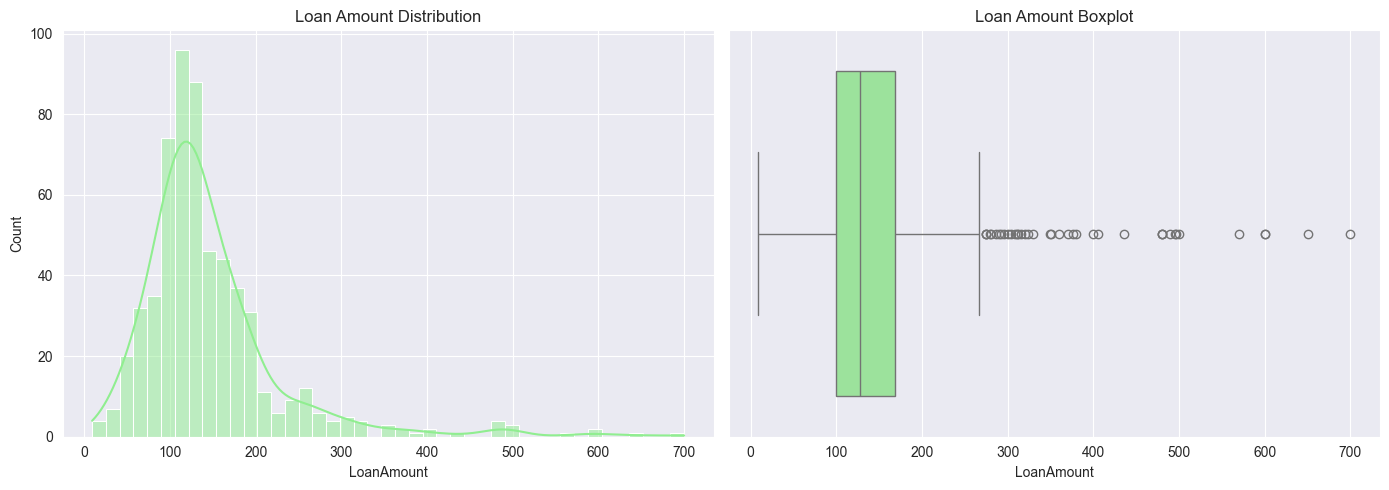

In [12]:
# Loan amount distribution and outliers
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['LoanAmount'], kde=True, color='lightgreen')
plt.title('Loan Amount Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='LoanAmount', data=train_df, color='lightgreen')
plt.title('Loan Amount Boxplot')

plt.tight_layout()
plt.show()

### Summary of Findings

**Categorical Variables:**
   - Most loan applicants are male, married, not self-employed, and have a credit history of 1.0.

**Ordinal Variables:**
   - Most applicants do not have dependents, are graduates, and belong to semi-urban areas.

**Numeric Variables:**
   - **Applicant Income:** There is high left skewness in the applicant income distribution, indicating the presence of outliers that need treatment before building the model. Anomalies are observed more frequently among graduates compared to non-graduates.
   - **Co Applicant Income:** There is high skewness in the co-applicant income distribution.
   - **Loan Amount:** There is light skewness in the loan amount distribution.

These findings provide valuable insights into the dataset's characteristics, which will inform subsequent data preprocessing and modeling steps.

## Data Cleaning and Preprocessing
Data cleaning and preprocessing involve tasks aimed at ensuring that the dataset is in a suitable format for analysis and modeling. This includes handling missing values, dealing with outliers, encoding categorical variables, and scaling numerical features. By performing these steps, we can improve the quality of the data and enhance the performance of our machine learning models.

In [13]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['int', 'float']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Impute missing values for categorical variables with mode
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Impute missing values for numerical variables with median
for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# Check again for missing values after imputation
missing_values_after_imputation = train_df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
# Replace '3+' in the Dependents column with '3' and convert to integer
train_df['Dependents'] = train_df['Dependents'].replace('3+', '3').astype(int)

# Convert object columns to binary and change data type to int
if train_df['Gender'].dtype == 'object':
    train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
if train_df['Married'].dtype == 'object':
    train_df['Married'] = train_df['Married'].map({'Yes': 1, 'No': 0})
if train_df['Education'].dtype == 'object':
    train_df['Education'] = train_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
if train_df['Self_Employed'].dtype == 'object':
    train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes': 1, 'No': 0})
if train_df['Loan_Status'].dtype == 'object':
    train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Perform one-hot encoding for Property_Area
train_df = pd.get_dummies(train_df, columns=['Property_Area'], drop_first=True)

# Drop Loan_ID column
train_df.drop(columns=['Loan_ID'], inplace=True)

train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,True


### Summary of Data Cleaning and Preprocessing

**Missing Value Imputation:**
- Before imputation, there were missing values in several columns.
- Missing values were imputed using the mode for categorical variables and the median for numerical variables.
- After imputation, there are no missing values remaining in the dataset.

**Additional Preprocessing:**
- Replaced '3+' in the Dependents column with '3' and converted the Dependents column to integer type.
- Mapped object columns (`Gender`, `Married`, `Education`, `Self_Employed`, `Loan_Status`) to convert them into binary form and then changed the data type to int.
- Encode `Property_Area` into numerical form using one-hot encoding.
- Drop `Loan_ID` column.

These preprocessing steps ensure that the dataset is cleaned, missing values are handled appropriately, and the data is in a suitable format for further analysis and modeling.

## Feature Selection
Feature selection is a crucial step in machine learning model development, aimed at identifying the most relevant features that contribute significantly to predicting the target variable. By selecting the most informative features, we can improve model performance, reduce over-fitting, and enhance interpretability. In this section, we will explore various techniques such as pair plots, correlation analysis using heatmaps, and bivariate analysis to identify correlations and important features for our model.

In [ ]:
# Pair plot for visualizing relationships between features
sns.pairplot(train_df, hue='Loan_Status', diag_kind='kde')
plt.show()


KeyboardInterrupt



In [ ]:
# Correlation matrix and heatmap
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Bivariate analysis for exploring relationships between features and target variable
plt.figure(figsize=(14, 12))

# Relationship between Credit_History and Loan_Status
plt.subplot(3, 2, 1)
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_df)
plt.title('Credit_History vs Loan_Status')

# Relationship between Dependents and Loan_Status
plt.subplot(3, 2, 2)
sns.countplot(x='Dependents', hue='Loan_Status', data=train_df)
plt.title('Dependents vs Loan_Status')

# Relationship between Gender and Loan_Status
plt.subplot(3, 2, 3)
sns.countplot(x='Gender', hue='Loan_Status', data=train_df)
plt.title('Gender vs Loan_Status')

# Relationship between Married and Loan_Status
plt.subplot(3, 2, 4)
sns.countplot(x='Married', hue='Loan_Status', data=train_df)
plt.title('Married vs Loan_Status')

# Relationship between Education and Loan_Status
plt.subplot(3, 2, 5)
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title('Education vs Loan_Status')

# Relationship between Self_Employed and Loan_Status
plt.subplot(3, 2, 6)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df)
plt.title('Self_Employed vs Loan_Status')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance Ranking:")
print(feature_importance_df)

### Summary of Feature Selection

- Applicants with a `Credit_History` of 1 are more likely to get a loan compared to those with a `Credit_History` of 0.
- Loan approval rates are similar across `Gender`.
- Graduates, `Self_Employed` individuals, and those with no `Dependents` have higher chances of loan approval.
- `Married` applicants tend to have better chances of loan approval, possibly due to higher combined income.
- Loan status is strongly correlated with `Credit_History`.
- There is evidence of multicollinearity, such as a strong correlation between `ApplicantIncome` and `LoanAmount`.

**Feature Importance Ranking:**
- `Credit_History` has the highest importance in predicting loan approval.
- `ApplicantIncome` and `LoanAmount` follow in importance, suggesting that these factors significantly influence loan decisions.
- `CoapplicantIncome`, `Dependents`, and `Loan_Amount_Term` also contribute to loan approval predictions, albeit to a lesser extent.
- `Property_Area`, `Married`, `Education`, `Self_Employed` status, and `Gender` have relatively lower importance in predicting loan approval.

Overall, these findings highlight the key factors influencing loan approval and provide insights for feature selection and model building in loan prediction tasks.

## Feature Engineering
Feature engineering involves creating new features or transforming existing ones to enhance model performance. In this section, we'll develop informative features by leveraging domain knowledge and insights from exploratory data analysis. By extracting meaningful information from the dataset, we aim to capture underlying patterns and relationships, ultimately improving the predictive power of our model.

In [ ]:
# Feature Engineering
train_df['MonthlyBalanceIncome'] = (train_df['ApplicantIncome'] + train_df['CoapplicantIncome']) - train_df['LoanAmount']

# Drop unnecessary columns
X = train_df.drop(columns=['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome'])
y = train_df['Loan_Status']

# Visualize correlation matrix
corr = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Model Training and Feature Importance
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance Ranking:")
print(feature_importance_df)

### Summary of Feature Engineering

In this section, we introduced a new feature called `MonthlyBalanceIncome`, which represents the monthly balance after deducting the loan amount from the sum of applicant and coapplicant incomes. Visualizing the correlation matrix revealed the relationships between features and the target variable `Loan_Status`. We then trained a Random Forest classifier to assess feature importance, which ranked `Credit_History` and the newly engineered feature `MonthlyBalanceIncome` as the most significant predictors of loan approval. This confirms the effectiveness of our feature engineering efforts in improving model performance and capturing important patterns in the data.


## Model Training:

In this section, we focus on training supervised learning algorithms using the selected features from the dataset. Firstly, we select the features identified through feature selection to set up the training dataset. Next, we split the dataset into training and testing sets to assess the models' performance on unseen data. We then proceed to train multiple supervised learning algorithms, including Logistic Regression, K-Nearest Neighbors (KNN), Random Forests, and Support Vector Machine (SVM). To optimize model hyperparameters and improve performance, we utilize GridSearchCV, a technique for systematically searching for the best combination of hyperparameters. By training and evaluating multiple models, we aim to identify the best-performing model for each algorithm, which will be further evaluated in the Model Evaluation section.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns and select features
X = train_df.drop(columns=['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome'])
y = train_df['Loan_Status']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=10000, random_state=42)

# Fit the model
lr_classifier.fit(X_train, y_train)

# No need for GridSearchCV as Logistic Regression doesn't have many hyperparameters to tune
best_lr_model = lr_classifier
best_lr_params = None

#### K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best model and its parameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# Print the best parameters
print("Best Parameters for K-Nearest Neighbors:", best_knn_params)

#### Random Forests Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for Random Forests:", best_rf_params)

#### Support Vector Machine (SVM) Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [2**i for i in range(-5, 6)],
    'gamma': [2**i for i in range(-5, 6)]
}

# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')
# svm_classifier = SVC(random_state=42)

# Perform GridSearchCV with fewer folds (e.g., cv=3)
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best model and its parameters
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

# Print the best parameters
print("Best Parameters for Support Vector Machine:", best_svm_params)

### Summary of Model Training

In the model training section, we employed various supervised learning algorithms to train models for predicting loan approval. We began by training a Logistic Regression model, which, due to its simplicity, didn't require hyperparameter tuning through GridSearchCV. For K-Nearest Neighbors (KNN), Random Forests, and Support Vector Machine (SVM), we utilized GridSearchCV to find the optimal hyperparameters. After training, we obtained the best models for each algorithm: Logistic Regression, K-Nearest Neighbors, Random Forests, and Support Vector Machine. These models will be further evaluated in the next section to assess their performance in predicting loan approval.


## Model Evaluation:
In the Model Evaluation section, we will assess the performance of the trained models using various evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. These metrics will provide insights into how well each model predicts loan approval. By comparing the performance of different models, we can determine which algorithm is the most suitable for this particular task. Additionally, we will visualize the evaluation results to gain a comprehensive understanding of each model's strengths and weaknesses in predicting loan approval. Let's proceed with evaluating the models and comparing their performance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to evaluate models and generate evaluation metrics
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc, cm

In [ ]:
# Initialize dictionaries to store evaluation metrics for each model
metrics = {}
confusion_matrices = {}

# Evaluate Logistic Regression model
accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr, cm_lr = evaluate_model(best_lr_model, X_test, y_test)
metrics['Logistic Regression'] = [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]
confusion_matrices['Logistic Regression'] = cm_lr

# Evaluate K-Nearest Neighbors model
accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn, cm_knn = evaluate_model(best_knn_model, X_test, y_test)
metrics['K-Nearest Neighbors'] = [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]
confusion_matrices['K-Nearest Neighbors'] = cm_knn

# Evaluate Random Forests model
accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf, cm_rf = evaluate_model(best_rf_model, X_test, y_test)
metrics['Random Forests'] = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
confusion_matrices['Random Forests'] = cm_rf

# Evaluate Support Vector Machine model
accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm, cm_svm = evaluate_model(best_svm_model, X_test, y_test)
metrics['Support Vector Machine'] = [accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm]
confusion_matrices['Support Vector Machine'] = cm_svm

# Print evaluation metrics
print("Evaluation Metrics:")
print("{:<25} {:^15} {:^15} {:^15} {:^15} {:^15}".format("Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"))
for model, scores in metrics.items():
    print("{:<25} {:.4f}          {:.4f}        {:.4f}        {:.4f}        {:.4f}".format(model, *scores))

# Visualize confusion matrices
plt.figure(figsize=(15, 8))
for i, (model, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    plt.title(model)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Comparison and Final Model Selection:
Compare the results of different models and select the one with the best performance.
Fine-tune hyperparameters if necessary.
Validate the final model on the testing set to ensure its generalization ability.